# Test GoData preparation

In [1]:
%matplotlib inline 

#%matplotlib notebook
#matplotlib widget
%reload_ext autoreload
%autoreload 2

In [2]:
import numpy     as np
import pandas    as pd
from   scipy     import stats
import os
import matplotlib.pyplot as plt

import xyimg.dataprep as dp
import xyimg.detsim   as dsim

In [3]:
pressure = '5bar'
sample   = '1eroi'

path      = os.environ['LPRDATADIR']
ifilename = path + dp.filename_voxel(pressure, sample)
ofile     = 'temp.h5'
print(ifilename)

/scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5


In [4]:
voxels = pd.read_hdf(ifilename, 'voxels')

In [5]:
dxs = dp.get_frame(voxels)
print('frame ', dxs, ', maximum', np.max(dxs))

frame  (276, 281, 304) , maximum 304


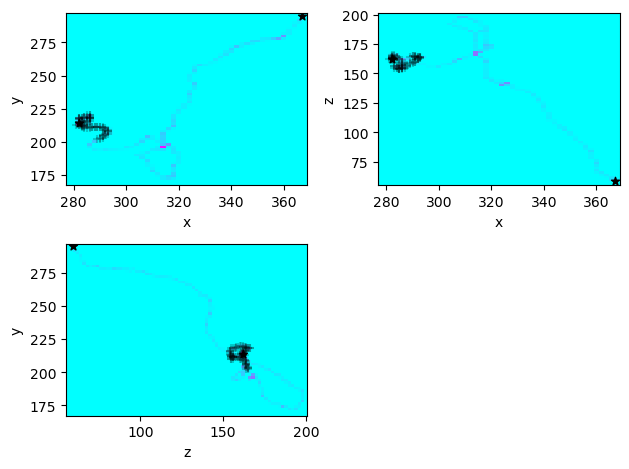

In [5]:
ievt = 24
evt = dsim.df_event(voxels, 1, ievt)
dsim.plot_event(evt, seg = 2, ext = 1)

,file_id,event,x,y,z,E,binclass,segclass,track_id,nhits,ext
10922,1,24,-36.991853,-9.720978,14.266802,0.043704,0,3,0,6,1
10923,1,24,-35.991853,-9.720978,14.266802,0.022112,0,3,0,4,1
10924,1,24,-35.991853,-9.720978,15.266802,0.007146,0,3,0,1,1


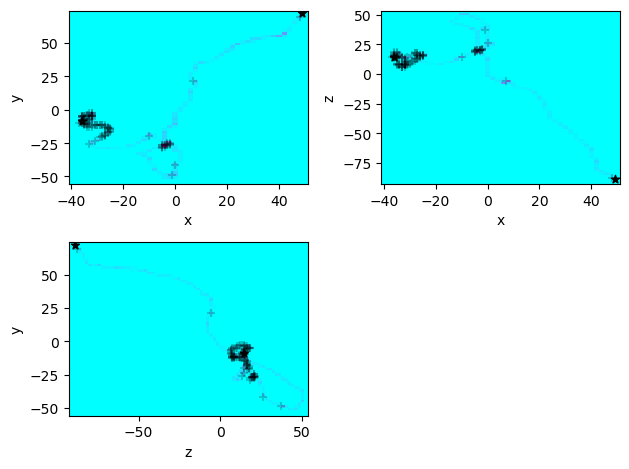

In [6]:
pevt = dp.evt_preparation(evt)
dsim.plot_event(pevt, seg = 2, ext = 2)
pevt[:3]

In [10]:
dp.test_evt_preparation(evt)

True

In [11]:
dfie = dp.evt_ielectrons(pevt)
dfie[:10]

,x,y,z,E,nie,file_id,event,track_id,hit_id,binclass,segclass,ext
0,-36.044419,-10.434113,13.945784,0.000025,1748,1,24,0,0,0,3,1
1,-36.522912,-9.869499,14.842355,0.000025,1748,1,24,0,0,0,3,1
2,-36.432473,-9.256446,14.580037,0.000025,1748,1,24,0,0,0,3,1
3,-37.458886,-10.223830,14.889681,0.000025,1748,1,24,0,0,0,3,1
4,-37.944198,-10.611374,14.342493,0.000025,1748,1,24,0,0,0,3,1
5,-37.180212,-9.181273,13.748761,0.000025,1748,1,24,0,0,0,3,1
6,-37.075876,-8.749442,14.183148,0.000025,1748,1,24,0,0,0,3,1
7,-36.536708,-10.561344,14.191746,0.000025,1748,1,24,0,0,0,3,1
8,-36.935591,-9.915093,13.852034,0.000025,1748,1,24,0,0,0,3,1
9,-37.275428,-9.478024,13.881546,0.000025,1748,1,24,0,0,0,3,1


0.0019588398281484842 2.511333113010877e-05 2.511333113010877e-05


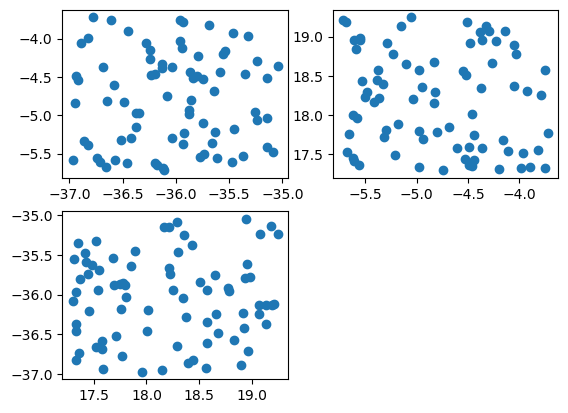

In [24]:
sel = dfie.hit_id == 10
plt.subplot(2, 2, 1); plt.scatter(dfie[sel].x, dfie[sel].y)
plt.subplot(2, 2, 2); plt.scatter(dfie[sel].y, dfie[sel].z)
plt.subplot(2, 2, 3); plt.scatter(dfie[sel].z, dfie[sel].x)
print(np.sum(dfie[sel].E), np.max(dfie[sel].E), np.mean(dfie[sel].E))

In [38]:
sigma = (2, 2, 2)
dfies = dp.evt_ielectrons_diffuse(dfie, sigma, copy = True)

In [39]:
dp.test_evt_ielectrons_diffuse(dfie)

True

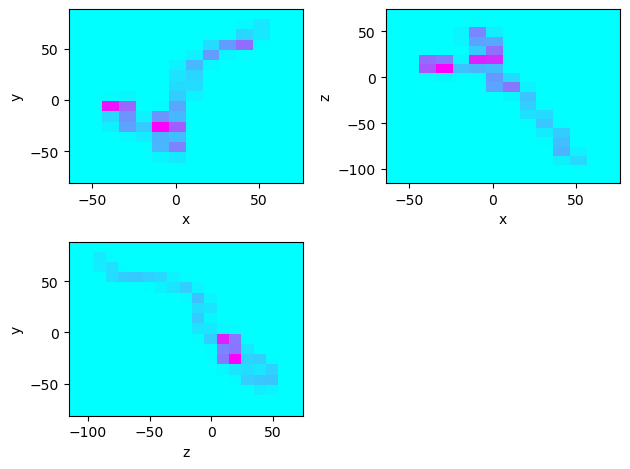

In [40]:
dsim.plot_event(dfies, width = 10)

In [44]:
shot = dp.evt_shot(dfies, pevt, width = (10, 10))

y   0
id  (1, 24)


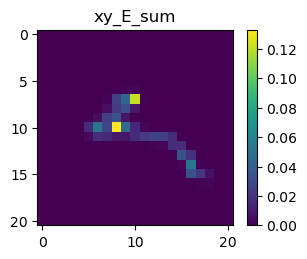

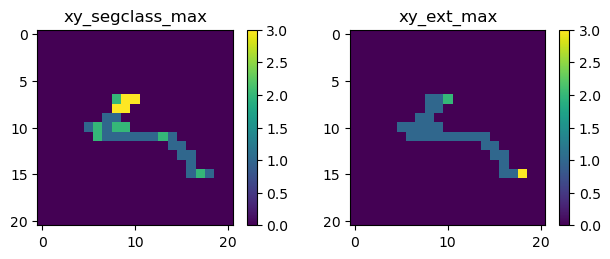

<Figure size 640x480 with 0 Axes>

In [45]:
dp.plot_godata(shot)

In [46]:
import time as time

In [49]:
ievt   = 30
sigma = (4, 4, 4)
evt0  = dsim.df_event(voxels, 1, ievt)
t0    = time.time()
evt1  = dp.evt_preparation(evt0)
dfie0 = dp.evt_ielectrons(evt1)
dfie1 = dp.evt_ielectrons_diffuse(dfie0, sigma)
shot  = dp.evt_shot(dfie1, width = (10, 10))
t1    = time.time()
print('time ', t1 - t0)

time  0.052959442138671875


In [50]:
ievt   = 30
sigma = (4, 4, 4)
evt0  = dsim.df_event(voxels, 1, ievt)
t0    = time.time()
evt1  = dp.evt_preparation(evt0)
#dfie0 = dp.evt_ielectrons(evt1)
#dfie1 = dp.evt_ielectrons_diffuse(dfie0, sigma)
shot  = dp.evt_shot(evt1, width = (10, 10))
t1    = time.time()
print('time ', t1 - t0)

time  0.005776643753051758


In [59]:
ifilename = ifilename
ofilename = 'test_shots.npz'
hit_width = (0, 0, 0)
sigma     = (0, 0, 0)
width     = (10, 10, 10)
frame     = 160
xlabel    = ('xy_E_sum', 'xy_z_mean', 'yz_E_sum', 'yz_x_mean', 'zx_E_sum', 'zx_y_mean')
zlabel    = ('xy_segclass_max', 'xy_ext_max', 'yz_segclass_max', 'yz_ext_max', 'zx_segclass_max', 'zx_ext_max')
nevents   = 100

shots = dp.run(ifilename, ofilename, hit_width = hit_width, sigma = sigma, width = width, frame = frame, nevents = nevents,
              xlabel = xlabel, zlabel = zlabel)
#sigma = sigma, width = width, frame = frame,
#        projection = projection, xlabel = xlabel, zlabel = zlabel, nevents = nevents)


input  filename       /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
output filename       test_shots.npz
hit widths      (mm)  (0, 0, 0)
wi              (eV)  2.5
sigma diffusion (mm)  (0, 0, 0)
widths          (mm)  (10, 10, 10)
frame           (mm)  160
xlabel                ('xy_E_sum', 'xy_z_mean', 'yz_E_sum', 'yz_x_mean', 'zx_E_sum', 'zx_y_mean')
zlabel                ('xy_segclass_max', 'xy_ext_max', 'yz_segclass_max', 'yz_ext_max', 'zx_segclass_max', 'zx_ext_max')
events                100
do ie             False
do ie inside hit  False
do ie diffusion   False
image pixel size in frame  [32, 32, 32]
opening voxel file :  /scratch/next/data/NEXT100/pressure_topology/voxel_dataset_5bar_1eroi.h5
processing event  100 , id  (2, 41)
save godata filename : test_shots.npz
event processed   101 
time per event    0.14 s
time execution        14.4  s
done!


In [67]:
shots = dp.godata_load(ofilename)

y   0
id  [ 1 20]


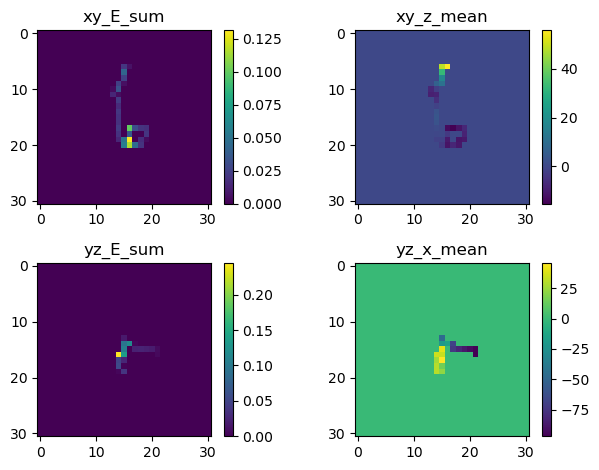

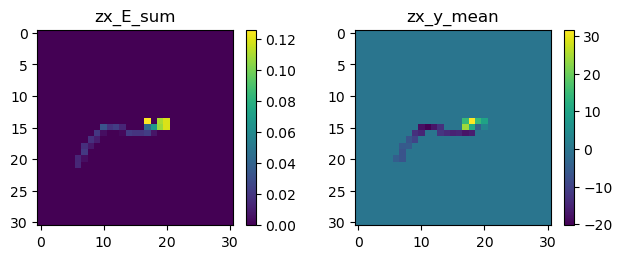

<Figure size 640x480 with 0 Axes>

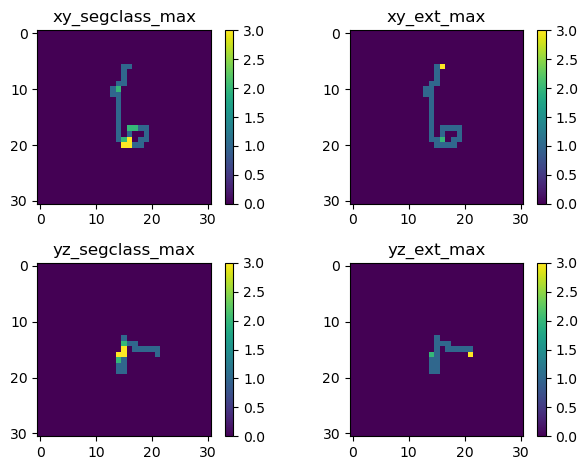

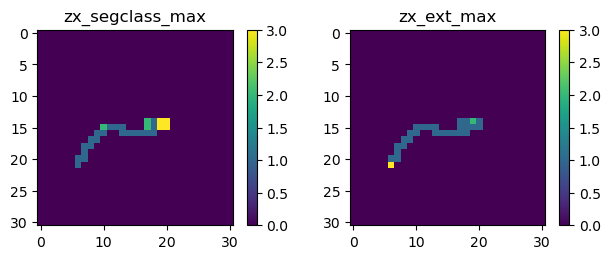

<Figure size 640x480 with 0 Axes>

In [68]:
ii = 20
dp.plot_godata(shots, ii)

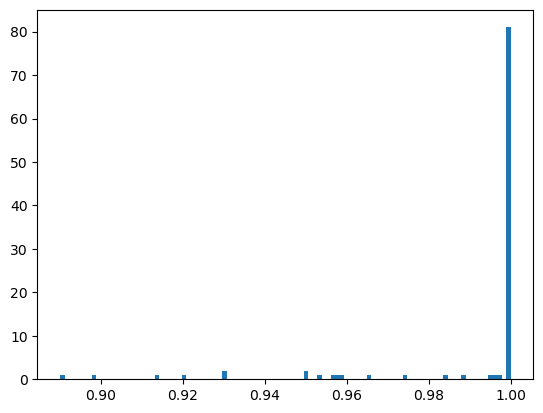

In [69]:
enes = [np.sum(x) for x in shots.xdic['zx_E_sum']]
plt.hist(enes, 100);